# Multi-table Datasets - ENRON Archive

## 1. Data import

Connect to the file 'assets/datasets/enron.db' using one of these methods:

- sqlite3 python package
- pandas.read_sql
- SQLite Manager Firefox extension

Take a look at the database and query the master table. How many Tables are there in the db?

> Answer:
There are 3 tables:
- MessageBase
- RecipientBase
- EmployeeBase

In [103]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import sqlite3
conn = sqlite3.connect('../../assets/datasets/enron.db')
c=conn.cursor()

In [12]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

[(u'MessageBase',), (u'RecipientBase',), (u'EmployeeBase',)]

Query the `sqlite_master` table to retrieve the schema of the `EmployeeBase` table.

1. What fields are there?
1. What's the type of each of them?

In [13]:
fields =c.execute("SELECT sql FROM sqlite_master WHERE type='table' and name='EmployeeBase';").fetchall()
print ''.join(fields[0])

fields =c.execute("SELECT sql FROM sqlite_master WHERE type='table' and name='MessageBase';").fetchall()
print ''.join(fields[0])

fields =c.execute("SELECT sql FROM sqlite_master WHERE type='table' and name='RecipientBase';").fetchall()
print ''.join(fields[0])

CREATE TABLE EmployeeBase (
                  [eid] INTEGER,
  [name] TEXT,
  [department] TEXT,
  [longdepartment] TEXT,
  [title] TEXT,
  [gender] TEXT,
  [seniority] TEXT
                  
                  )
CREATE TABLE MessageBase (
    mid INTEGER,
    filename TEXT,
    unix_time INTEGER,
    subject TEXT,
    from_eid INTEGER,
    
    PRIMARY KEY(mid ASC),
    FOREIGN KEY(from_eid) REFERENCES Employee(eid)
)
CREATE TABLE RecipientBase (
    mid INTEGER,
    rno INTEGER,
    to_eid INTEGER,
    
    PRIMARY KEY(mid ASC, rno ASC)
    FOREIGN KEY(mid) REFERENCES Message(mid)
    FOREIGN KEY(to_eid) REFERENCES Employee(eid)
)


1. Print the first 5 rows of EmployeeBase table
1. Print the first 5 rows of MessageBase table
1. Print the first 5 rows of RecipientBase table

**Hint**  use `SELECT` and `LIMIT`.

In [16]:
from pandas.io import sql
sql.read_sql('SELECT * FROM EmployeeBase LIMIT 5;', con=conn)

,eid,name,department,longdepartment,title,gender,seniority
0,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior
1,2,Harry Arora,Forestry,ENA East Power,VP Trading,Male,Senior
2,3,Robert Badeer,Forestry,ENA West Power,Mgr Trading,Male,Junior
3,4,Susan Bailey,Legal,ENA Legal,Specialist Legal,Female,Junior
4,5,Eric Bass,Forestry,ENA Gas Texas,Trader,Male,Junior


In [17]:
sql.read_sql('SELECT * FROM MessageBase LIMIT 5;', con=conn)

,mid,filename,unix_time,subject,from_eid
0,1,taylor-m/sent/11,910930020,Cd$ CME letter,138
1,2,taylor-m/sent/17,911459940,Indemnification,138
2,3,taylor-m/sent/18,911463840,Re: Indemnification,138
3,4,taylor-m/sent/23,911874180,"Re: Coral Energy, L.P.",138
4,5,taylor-m/sent/27,912396120,Bankruptcy Code revisions,138


In [18]:
sql.read_sql('SELECT * FROM RecipientBase LIMIT 5;', con=conn)

,mid,rno,to_eid
0,1,1,59
1,2,1,15
2,3,1,15
3,4,1,109
4,4,2,49


Import each of the 3 tables to a Pandas Dataframes

In [49]:
employee = pd.read_sql("SELECT * FROM EmployeeBase", conn)
recipient = pd.read_sql("SELECT * FROM RecipientBase", conn)
message = pd.read_sql("SELECT * FROM MessageBase", conn)

In [50]:
employee.head()

,eid,name,department,longdepartment,title,gender,seniority
0,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior
1,2,Harry Arora,Forestry,ENA East Power,VP Trading,Male,Senior
2,3,Robert Badeer,Forestry,ENA West Power,Mgr Trading,Male,Junior
3,4,Susan Bailey,Legal,ENA Legal,Specialist Legal,Female,Junior
4,5,Eric Bass,Forestry,ENA Gas Texas,Trader,Male,Junior


In [51]:
message.head()

,mid,filename,unix_time,subject,from_eid
0,1,taylor-m/sent/11,910930020,Cd$ CME letter,138
1,2,taylor-m/sent/17,911459940,Indemnification,138
2,3,taylor-m/sent/18,911463840,Re: Indemnification,138
3,4,taylor-m/sent/23,911874180,"Re: Coral Energy, L.P.",138
4,5,taylor-m/sent/27,912396120,Bankruptcy Code revisions,138


In [69]:
recipient

,mid,rno,to_eid
0,1,1,59
1,2,1,15
2,3,1,15
3,4,1,109
4,4,2,49
5,4,3,120
6,4,4,59
7,5,1,45
8,5,2,53
9,6,1,113


## 2. Data Exploration

Use the 3 dataframes to answer the following questions:

1. How many employees are there in the company?
- How many messages are there in the database?
- Convert the timestamp column in the messages. When was the oldest message sent? And the newest?
- Some messages are sent to more than one recipient. Group the messages by message_id and count the number of recepients. Then look at the distribution of recepient numbers.
    - How many messages have only one recepient?
    - How many messages have >= 5 recepients?
    - What's the highest number of recepients?
    - Who sent the message with the highest number of recepients?
- Plot the distribution of recepient numbers using Bokeh.

1.How many employees are there in the company?

In [53]:
sql.read_sql('SELECT count(eid) FROM employee;', con=conn)

,count(eid)
0,156


In [54]:
len(employee)

156

    2. How many messages are there in the database?

In [55]:
sql.read_sql('SELECT count(mid) FROM message;', con=conn)

,count(mid)
0,21635


In [56]:
len(message)

21635

     4. Convert the timestamp column in the messages. When was the oldest message sent? And the newest?

In [63]:
message['unix_time'] = pd.to_datetime(message['unix_time'],unit='s')
message.head()

,mid,filename,unix_time,subject,from_eid
0,1,taylor-m/sent/11,1998-11-13 04:07:00,Cd$ CME letter,138
1,2,taylor-m/sent/17,1998-11-19 07:19:00,Indemnification,138
2,3,taylor-m/sent/18,1998-11-19 08:24:00,Re: Indemnification,138
3,4,taylor-m/sent/23,1998-11-24 02:23:00,"Re: Coral Energy, L.P.",138
4,5,taylor-m/sent/27,1998-11-30 03:22:00,Bankruptcy Code revisions,138


In [64]:
message['unix_time'].max()

Timestamp('2002-06-21 13:37:34')

In [65]:
message['unix_time'].min()

Timestamp('1998-11-13 04:07:00')

        4. Some messages are sent to more than one recipient. Group the messages by message_id and count the number of recepients. Then look at the distribution of recepient numbers.
    .How many messages have only one recepient?
    .How many messages have >= 5 recepients?
    .What's the highest number of recepients?
    .Who sent the message with the highest number of recepients?

In [102]:
rec_msg = recipient.groupby('mid').count()
rec_msg

,rno,to_eid
mid,,
1,1,1
2,1,1
3,1,1
4,4,4
5,2,2
6,1,1
7,1,1
8,1,1
9,1,1


(array([  1.79470000e+04,   1.43500000e+03,   8.73000000e+02,
          7.11000000e+02,   1.80000000e+02,   1.76000000e+02,
          6.10000000e+01,   2.40000000e+01,   7.60000000e+01,
          3.30000000e+01,   5.70000000e+01,   1.10000000e+01,
          2.80000000e+01,   9.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

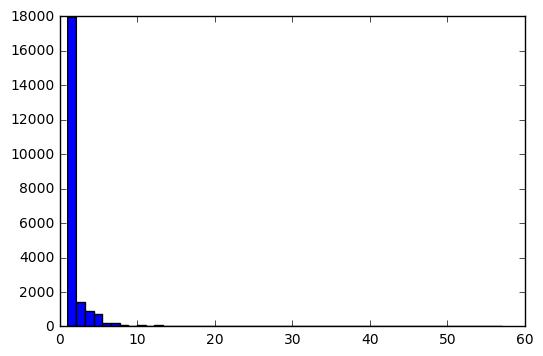

In [108]:
plt.hist(rec_msg['to_eid'], bins=50)
plt.title('Histogram of Attacker and Defender Size')
plt.xlabel('Number of troops')
plt.ylabel('Number of battles')
plt.legend(loc='upper right')
#plt.hist(data1, 
#          bins=bins, 
#          alpha=0.5, 
#          color='#EDD834',
#          label='Attacker')

Rescale to investigate the tail of the curve

## 3. Data Merging

Use the pandas merge function to combine the information in the 3 dataframes to answer the following questions:

1. Are there more Men or Women employees?
- How is gender distributed across departments?
- Who is sending more emails? Men or Women?
- What's the average number of emails sent by each gender?
- Are there more Juniors or Seniors?
- Who is sending more emails? Juniors or Seniors?
- Which department is sending more emails? How does that relate with the number of employees in the department?
- Who are the top 3 senders of emails? (people who sent out the most emails)

Answer the following questions regarding received messages:

- Who is receiving more emails? Men or Women?
- Who is receiving more emails? Juniors or Seniors?
- Which department is receiving more emails? How does that relate with the number of employees in the department?
- Who are the top 5 receivers of emails? (people who received the most emails)

Which employees sent the most 'mass' emails?

Keep exploring the dataset, which other questions would you ask?

Work in pairs. Give each other a challenge and try to solve it.